# Exercise: Derivatives

- by Börge Göbel

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

### Load data

In [2]:
data = np.loadtxt("04b_Exercise_velocity_acceleration_data_file.dat")

In [3]:
data

array([[  0.        ,   1.        ],
       [  0.1       ,   1.01980001],
       [  0.2       ,   1.03920011],
       ...,
       [ 99.8       ,  15.25565932],
       [ 99.9       ,  15.33160759],
       [100.        ,  15.40808206]])

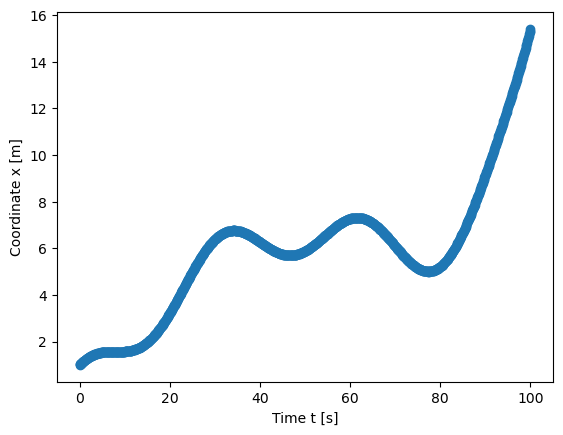

In [4]:
plt.xlabel('Time t [s]')
plt.ylabel('Coordinate x [m]')
plt.scatter(data[:,0],data[:,1])

### Task

Calculate the velocity \\(v(t)=\dot{x}(t)\\) and the acceleration \\(a(t)=\ddot{x}(t)\\) for the loaded data set that describes a set of points \\((t_i,x_i)\\) for \\(i=0,\dots,1000\\).

1. Calculate \\(v_i\\) and \\(a_i\\) using the forward-differences, central-differences and Richardson methods
2. Determine the maximum value of the acceleration and the corresponding time.

Be careful, now we do not know the function \\(x(t)\\) but only its values for specific points. You have to define the functions for the derivativesa bit differently.

### Solution

In [5]:
data[:,0]

array([  0. ,   0.1,   0.2, ...,  99.8,  99.9, 100. ])

In [6]:
def forward(data):
    derive = np.zeros(len(data[:,1]))
    # for equidistant data
    # h = (data[1,0]-data[0,0])
    # velocity[:-1] = (data[1:,1]-data[:-1,1]) / h
    # general
    derive[:-1] = (data[1:,1]-data[:-1,1]) / (data[1:,0]-data[:-1,0])
    # last value use backwards method (or just set to second-last value)
    derive[-1] = (data[-1,1]-data[-2,1]) / (data[-1,0]-data[-2,0])
    return np.transpose([data[:,0],derive])

In [7]:
velocityForward = forward(data)
accelerationForward = forward(forward(data))

In [8]:
def central(data):
    derive = np.zeros(len(data[:,1]))
    derive[1:-1] = (data[2:,1]-data[:-2,1]) / (data[2:,0]-data[:-2,0])
    # first value use forward method (or just set to second value)
    derive[0] = (data[1,1]-data[0,1]) / (data[1,0]-data[0,0])
    # last value use backward method (or just set to second-last value)
    derive[-1] = (data[-1,1]-data[-2,1]) / (data[-1,0]-data[-2,0])
    return np.transpose([data[:,0],derive])

In [9]:
velocityCentral = central(data)
accelerationCentral = central(central(data))

In [10]:
def Richardson(data):
    derive = np.zeros(len(data[:,1]))
    derive[2:-2] = (-data[4:,1]+8*data[3:-1,1]-8*data[1:-3,1]+data[:-4,1]) / (12*(data[3:-1,0]-data[2:-2,0]))
    # first values 
    derive[0] = (data[1,1]-data[0,1]) / (data[1,0]-data[0,0])
    derive[1] = (data[2,1]-data[0,1]) / (data[2,0]-data[0,0])
    # last values 
    derive[-2] = (data[-1,1]-data[-3,1]) / (data[-1,0]-data[-3,0])
    derive[-1] = (data[-1,1]-data[-2,1]) / (data[-1,0]-data[-2,0])
    return np.transpose([data[:,0],derive])

In [11]:
velocityRichardson = Richardson(data)
accelerationRichardson = Richardson(Richardson(data))

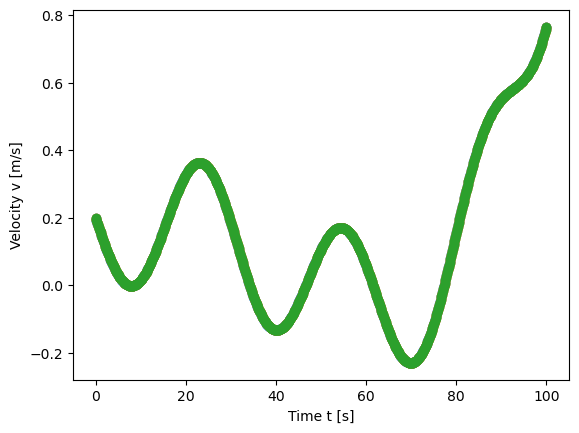

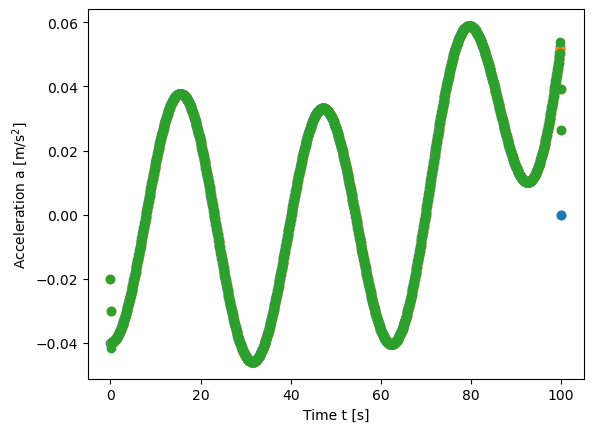

In [12]:
plt.xlabel('Time t [s]')
plt.ylabel('Velocity v [m/s]')
plt.scatter(velocityForward[:,0],velocityForward[:,1])
plt.scatter(velocityCentral[:,0],velocityCentral[:,1])
plt.scatter(velocityRichardson[:,0],velocityRichardson[:,1])
plt.show()

plt.xlabel('Time t [s]')
plt.ylabel('Acceleration a [m/s$^2$]')
plt.scatter(accelerationForward[:,0],accelerationForward[:,1])
plt.scatter(accelerationCentral[:,0],accelerationCentral[:,1])
plt.scatter(accelerationRichardson[:,0],accelerationRichardson[:,1])
plt.show()

_- Without the inaccurate points_

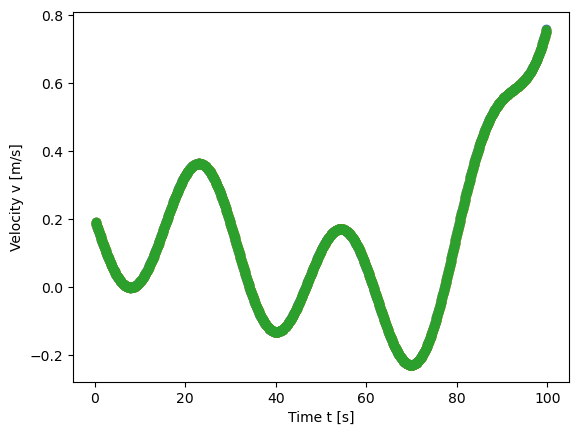

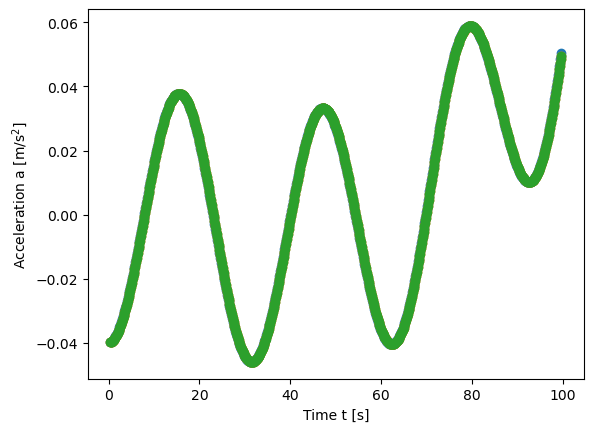

In [13]:
plt.xlabel('Time t [s]')
plt.ylabel('Velocity v [m/s]')
plt.scatter(velocityForward[2:-2,0],velocityForward[2:-2,1])
plt.scatter(velocityCentral[2:-2,0],velocityCentral[2:-2,1])
plt.scatter(velocityRichardson[2:-2,0],velocityRichardson[2:-2,1])
plt.show()

plt.xlabel('Time t [s]')
plt.ylabel('Acceleration a [m/s$^2$]')
plt.scatter(accelerationForward[4:-4,0],accelerationForward[4:-4,1])
plt.scatter(accelerationCentral[4:-4,0],accelerationCentral[4:-4,1])
plt.scatter(accelerationRichardson[4:-4,0],accelerationRichardson[4:-4,1])
plt.show()

### How the data was generated

- Position
\\(
x(t) = \cos(at)+bt^5+ct^4+dt
\\)


- Parameters
\\(
a = 0.2\,\frac{1}{\mathrm{s}}\\
b = 0.95\times 10^{-8}\,\mathrm{m}\\
c = -10^{-6}\,\mathrm{m}\\
d = 0.2\,\mathrm{m}
\\)

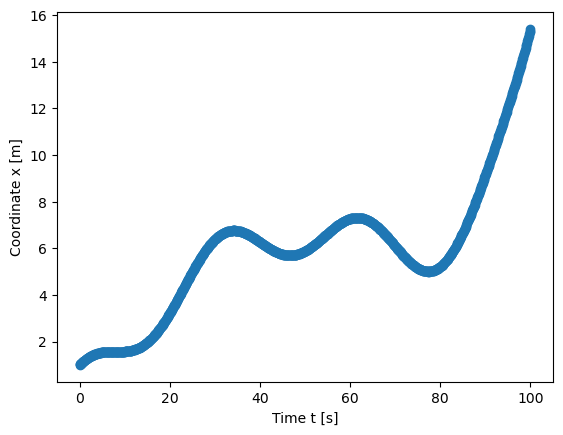

In [15]:
a = 0.2
b = 0.95e-8
c = -1e-6
d = 0.2

def position(t):
    return np.cos(a*t) + b*t**5 + c*t**4 + d*t

tList = np.linspace(0,100,1001)
xList = position(tList)

plt.xlabel('Time t [s]')
plt.ylabel('Coordinate x [m]')
plt.scatter(tList,xList)

In [16]:
data = np.transpose([tList,xList])

In [17]:
data

array([[  0.        ,   1.        ],
       [  0.1       ,   1.01980001],
       [  0.2       ,   1.03920011],
       ...,
       [ 99.8       ,  15.25565932],
       [ 99.9       ,  15.33160759],
       [100.        ,  15.40808206]])

In [18]:
np.savetxt("04b_Exercise_velocity_acceleration_data_file.dat", data, fmt="%s")

### Compare with analytical solution

- velocity & acceleration
\\(
v(t)=\dot{x}(t) = -a\sin(at) + 5bt^4+4ct^3+d\\
a(t)=\ddot{x}(t) = -a^2\cos(at) + 20bt^3+12ct^2
\\)


In [19]:
def velocity(t):
    return -a*np.sin(a*t) + 5*b*t**4 +4*c*t**3 + d

def acceleration(t):
    return -a**2*np.cos(a*t) + 20*b*t**3 +12*c*t**2

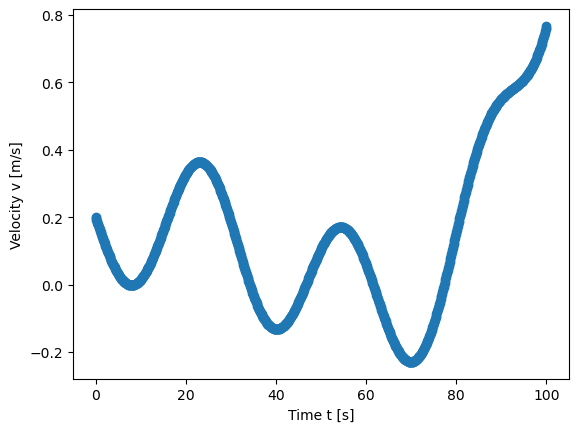

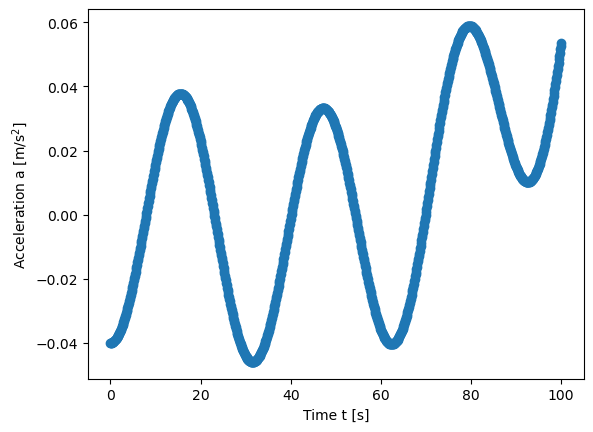

In [20]:
tList = np.linspace(0,100,1001)
vList = velocity(tList)
aList = acceleration(tList)

plt.xlabel('Time t [s]')
plt.ylabel('Velocity v [m/s]')
plt.scatter(tList,vList)
plt.show()

plt.xlabel('Time t [s]')
plt.ylabel('Acceleration a [m/s$^2$]')
plt.scatter(tList,aList)
plt.show()

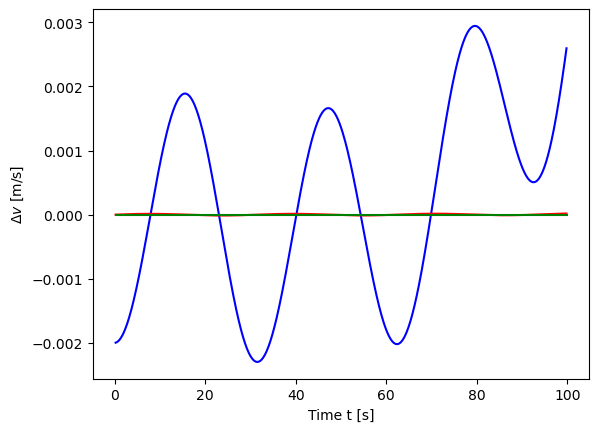

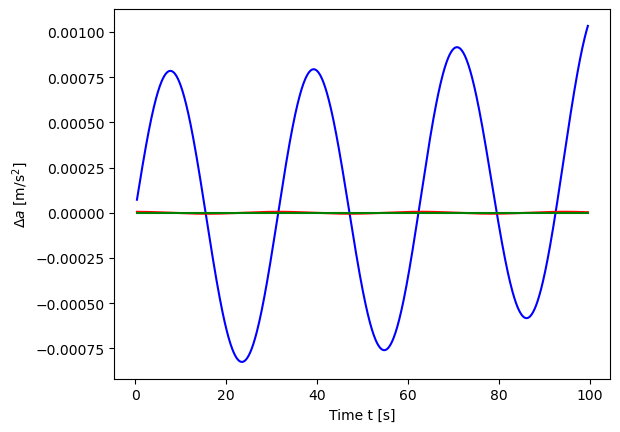

In [21]:
plt.xlabel('Time t [s]')
plt.ylabel('$\Delta v$ [m/s]')
plt.plot(tList[2:-2],velocityForward[2:-2,1]-vList[2:-2],'blue')
plt.plot(tList[2:-2],velocityCentral[2:-2,1]-vList[2:-2],'red')
plt.plot(tList[2:-2],velocityRichardson[2:-2,1]-vList[2:-2],'green')
plt.show()

plt.xlabel('Time t [s]')
plt.ylabel('$\Delta a$ [m/s$^2$]')
plt.plot(tList[4:-4],accelerationForward[4:-4,1]-aList[4:-4],'blue')
plt.plot(tList[4:-4],accelerationCentral[4:-4,1]-aList[4:-4],'red')
plt.plot(tList[4:-4],accelerationRichardson[4:-4,1]-aList[4:-4],'green')
plt.show()

_- Total error_
\\( \sum_i (v_n(t_i)-v_a(t_i))^2 \\)

In [22]:
print( sum((velocityForward[2:-2,1]-vList[2:-2])**2) )
print( sum((velocityCentral[2:-2,1]-vList[2:-2])**2) )
print( sum((velocityRichardson[2:-2,1]-vList[2:-2])**2) )

0.002427824988964186
8.903209968415735e-08
5.566204890981249e-16


_- Total error_
\\( \sum_i (a_n(t_i)-a_a(t_i))^2 \\)

In [24]:
print( sum((accelerationForward[4:-4,1]-aList[4:-4])**2) )
print( sum((accelerationCentral[4:-4,1]-aList[4:-4])**2) )
print( sum((accelerationRichardson[4:-4,1]-aList[4:-4])**2) )

0.00031896113294448787
1.4528874612961403e-08
9.195018806923526e-17


### Determine maximum acceleration

In [25]:
accelerationRichardson

array([[ 0.00000000e+00, -1.99954035e-02],
       [ 1.00000000e-01, -2.99898219e-02],
       [ 2.00000000e-01, -4.16368452e-02],
       ...,
       [ 9.98000000e+01,  5.39100475e-02],
       [ 9.99000000e+01,  3.92904337e-02],
       [ 1.00000000e+02,  2.63103838e-02]])

In [26]:
accelerationMax = max( accelerationRichardson[:,1] )

In [27]:
indexAccelerationMax = np.argmax( accelerationRichardson[:,1] )

In [28]:
timeAccelerationMax = accelerationRichardson[indexAccelerationMax,0]

In [29]:
print(accelerationMax)
print(indexAccelerationMax)
print(timeAccelerationMax)

0.058898335802765
796
79.60000000000001
